In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\Arnav Agarwal\Desktop\population-prediction\data\indian population new.csv')

In [32]:
useful_data = data[['Year','Population','% Increase in Population']]

In [33]:
def fixdata(string):
    ans = ""
    for i in string:
        if i != ',':
            ans += i 
    return int(ans)

In [34]:
useful_data['Population'] = useful_data['Population'].apply(fixdata)

ARIMA MODEL

# Model Selection
Select a model to analyze population prediction.

In [40]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error , mean_absolute_error , r2_score
X_train,X_test = pd.Series(useful_data['Population'][:70]) , pd.Series(useful_data['Population'][70:])

In [24]:
def train_model(p,d,q):
    try:
        train_const = [x for x in X_train]
        pred_list = []
        for j in range(len(X_test)):
            model = ARIMA(train_const,order=(p,d,q))
            model_fit = model.fit()
            output = model_fit.forecast()
            pred = output[0]
            pred_list.append(pred)
            actual = X_test.iloc[0]
            train_const.append(X_test.iloc[j])

        main[root_mean_squared_error(X_test,pred_list)] = (p,d,q)
    except:
        print("not working for ",p,d,q)

main = {}
for p in range(5):
    for d in range(5):
        for q in range(5):
            train_model(p,d,q)
    
print("Values for P,D,Q " , main[min(main)])

not working for  3 1 1
not working for  3 4 3
not working for  4 0 0
not working for  4 0 1
not working for  4 0 3
not working for  4 2 4
Values for P,D,Q  (3, 0, 3)


In [44]:
train_const = [x for x in X_train]
pred_list = []
for j in range(len(X_test)):
    model = ARIMA(train_const,order=(3,0,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred = output[0]
    pred_list.append(pred)
    actual = X_test.iloc[0]
    train_const.append(X_test.iloc[j])

print("RMSE :" , root_mean_squared_error(X_test,pred_list))
print("MAE :",mean_absolute_error(X_test,pred_list))
print("R2 Score :",r2_score(X_test,pred_list))

RMSE : 708582.0397548603
MAE : 692344.4702471098
R2 Score : 0.9930407024009115


In [46]:
mean_perc_error = 0
for i in range(len(pred_list)):
    mean_perc_error += round(100*abs(X_test.iloc[i] - pred_list[i])/X_test.iloc[i],2)

print("MPE :",mean_perc_error,"%")

MPE : 0.14 %


Inference
- R2 Score closer to 1 indicates that the model is able to predict the population very well
- Mean percentage error is 0.14% which is very low and favourable

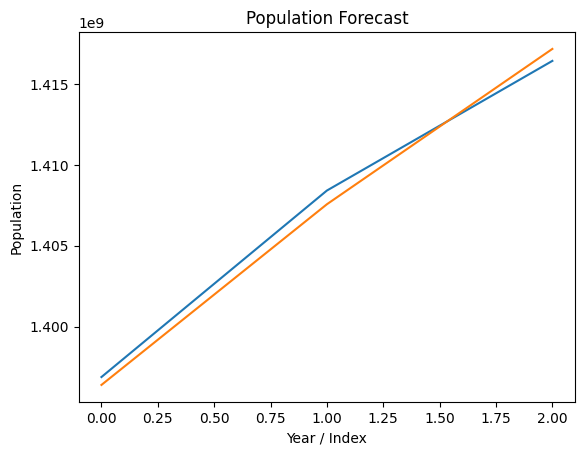

In [28]:
plt.plot(pred_list)
plt.plot(X_test.values)
plt.xlabel("Year / Index")
plt.ylabel("Population")
plt.title("Population Forecast")
plt.show()